In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
file_path=r"C:\Users\afef.jebali\OneDrive - TUI\Desktop\Training Course\Exercice 01\titanic-passengers.csv"
df=pd.read_csv(file_path)
df.head()

,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
343;No;2;Collander,Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S
76;No;3;Moen,Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F...
641;No;3;Jensen,Mr. Hans Peder;male;20.0;0;0;350050;7.8542000...
568;No;3;Palsson,Mrs. Nils (Alma Cornelia Berglund);female;29....
672;No;1;Davidson,Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 343;No;2;Collander to 428;Yes;2;"Phillips
Data columns (total 1 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked  891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [22]:
file_path = r"C:\Users\afef.jebali\OneDrive - TUI\Desktop\Training Course\Exercice 01\titanic-passengers.csv"

# Read the dataset and display the column names
titanic_data = pd.read_csv(file_path, sep=';')
print(titanic_data.columns)

# This will display the column names to ensure they match what i'm trying to use as features


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [23]:
#1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 
import pandas as pd
# Read the Titanic dataset
titanic_data = pd.read_csv(file_path, sep=';')

# Encode 'Survived' column to numerical values
titanic_data['Survived'] = titanic_data['Survived'].map({'No': 0, 'Yes': 1})

# One-hot encode the 'Sex' column
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'])

# Check the columns to verify the presence of 'Sex_female' and 'Sex_male'
print(titanic_data.columns)

# Update the features list based on the columns available
# Define the features and the target variable, excluding non-numeric and already encoded columns
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male']
target = 'Survived'

# Split the data into features and target variable
X = titanic_data[features]
y = titanic_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model with the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female', 'Sex_male'],
      dtype='object')
Decision Tree Accuracy: 0.8212290502793296


In [24]:
pip install graphviz


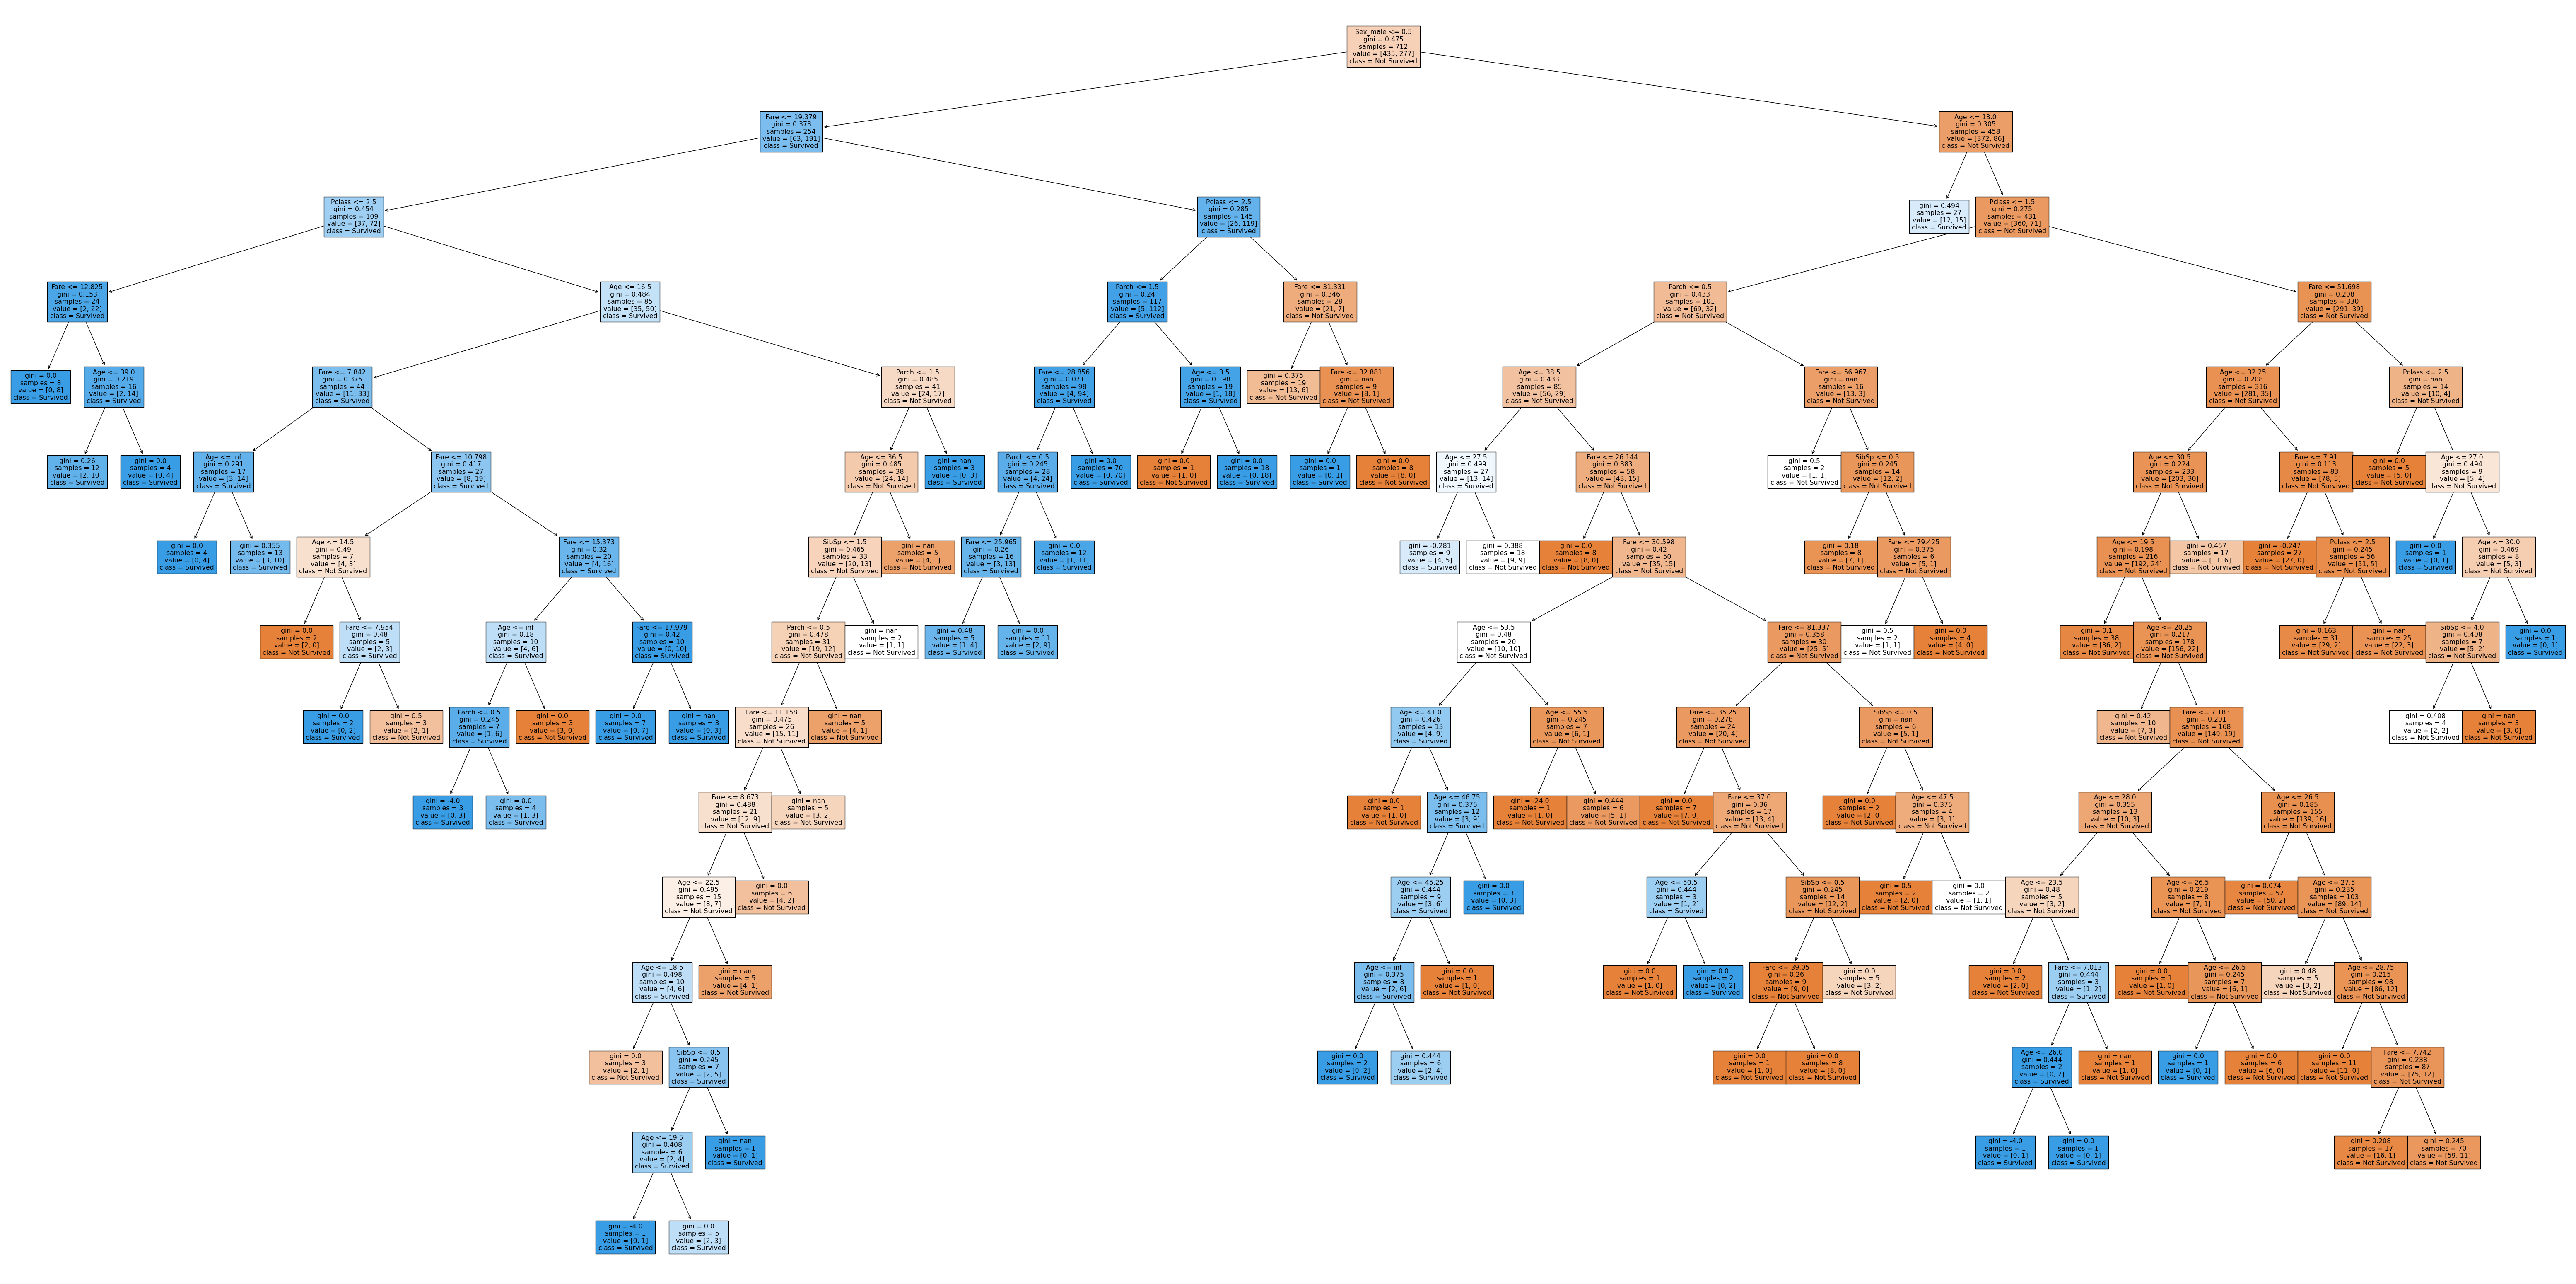

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model with the training data
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(80, 40))
plot_tree(decision_tree, feature_names=features, class_names=["Not Survived", "Survived"], filled=True)
plt.show()


In [12]:
#3. Change the decision tree parameters(at least two parameters). 
# Create a Decision Tree classifier with adjusted parameters setting max_depth to 5 and min_samples_split to 5.
decision_tree_modified = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

# Fit the model with the training data
decision_tree_modified.fit(X_train, y_train)

# Predict on the testing set
y_pred_modified = decision_tree_modified.predict(X_test)

# Calculate accuracy of the model with modified parameters
accuracy_modified = accuracy_score(y_test, y_pred_modified)
print(f"Decision Tree Accuracy with modified parameters: {accuracy_modified}")


Decision Tree Accuracy with modified parameters: 0.7877094972067039


In [13]:
#4. Calculate the new accuracy and compare it with the previous results. 

# Calculate accuracy of the model with modified parameters
accuracy_modified = accuracy_score(y_test, y_pred_modified)
print(f"Decision Tree Accuracy with modified parameters: {accuracy_modified}")

# Compare with the previous accuracy
print(f"Previous Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy with modified parameters: 0.7877094972067039
Previous Decision Tree Accuracy: 0.8212290502793296


In [28]:
# the first model is more aaccurate than the second one

In [14]:
#5. Use a random forest then change the number of estimators.

#'X_train' and 'X_test' are the training and testing feature sets

# Handling missing values (filling NaN values with the mean of the column)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Random Forest classifier with a specific number of estimators
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit the model with the imputed training data
random_forest.fit(X_train_imputed, y_train)

# Predict on the imputed testing set
y_pred_rf = random_forest.predict(X_test_imputed)

# Calculate accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy with 10 estimators: {accuracy_rf}")


Random Forest Accuracy with 10 estimators: 0.7988826815642458


In [29]:
#6. Calculate the new accuracy and compare it with the previous result.

# Calculate accuracy of the model after handling missing values
accuracy_rf_imputed = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy with imputed data: {accuracy_rf_imputed}")

print(f"Previous Decision Tree Accuracy: {accuracy}")

Random Forest Accuracy with imputed data: 0.7988826815642458
Previous Decision Tree Accuracy: 0.8212290502793296


In [ ]:
#the normal Decision Tree model is more aaccurate than The Random Forest model.